In [2]:
import pymongo as pm
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
client = pm.MongoClient("mongodb://192.168.0.109:27017")
db = client["tarea"]

In [16]:
fase1 = { "$match": { "Date": { "$gte": dt.datetime(2019, 1, 4, 0, 0), "$lte": dt.datetime(2022, 6, 1, 0, 0) },
                      "Symbol": "ASML" } }
fase2 = { "$project": { "Date_new": { "$dateToString": { "format": "%Y-%m", "date": "$Date" } }, "High": 1, "Date": 1 } }
fase3 = { "$group": { "_id": "$Date_new", "High": { "$max": "$High" } } }
fase4 = { "$sort": { "_id": 1 } }
df = pd.DataFrame( db.get_collection("stocks").aggregate( [ fase1, fase2, fase3, fase4 ] ) )

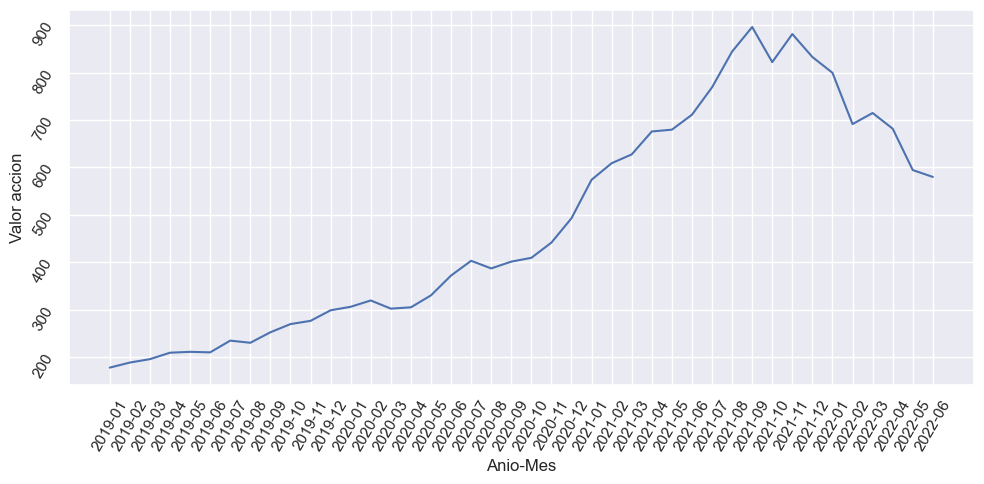

In [17]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
sns.set_theme( style="darkgrid" )
ax = sns.lineplot( x="_id", y="High", data=df )
ax.tick_params (rotation = 60)
ax.set(xlabel='Anio-Mes', ylabel='Valor accion')
plt.show()